# Metric Comparisons

Compares:
- DeepSEA
- Epitome

Creates 4 heatmaps comparing AUC and PR results for DeepSEA and Epitome.

In [55]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams

In [101]:
epitome_output = '/home/eecs/akmorrow/epitome/out/Epitome'

deepSEA_output = '/home/eecs/akmorrow/epitome/out/DeepSEA'

plot_output = '/home/eecs/akmorrow/epitome/out/figures'

In [187]:
## Functions

def saveHeatmap(df, output_filepath, annot=False, cmap = 'coolwarm'):

    sns.heatmap(df, annot=annot, cmap = cmap)
    
    plt.savefig(output_filepath, bbox_inches = "tight")
    
def intersection(lst1, lst2): 
  
    # Use of hybrid method 
    temp = set(lst2) 
    lst3 = [value for value in lst1 if value in temp] 
    return lst3 
     

## AUC Comparisons

In [37]:
deepsea_av_auc = pd.read_csv(os.path.join(deepSEA_output, "DeepSEA_AVERAGE_AUC.csv"), sep="\t")

deepsea_auc = pd.read_csv(os.path.join(deepSEA_output, "DeepSEA_AUC.csv"), sep="\t")

epitome_auc = pd.read_csv(os.path.join(epitome_output, "Epitome_AUC.csv"), sep="\t")

epitome_auc.set_index('CellType', inplace=True)
deepsea_auc.set_index('CellType', inplace=True)
deepsea_av_auc.set_index('CellType', inplace=True)

In [170]:
### Heatmaps

c1 = list(deepsea_auc.columns)

c1.remove('Unnamed: 0')
c1.remove('DNase')
c1.remove('AUC_Average_Macro')
c1.remove('AUC_Average_Micro')


c2 = list(epitome_auc.columns)

c2.remove('Unnamed: 0')
c2.remove('AUC_Average_Macro')
c2.remove('AUC_Average_Micro')

def intersection(lst1, lst2): 
  
    # Use of hybrid method 
    temp = set(lst2) 
    lst3 = [value for value in lst1 if value in temp] 
    return lst3 
     
c_auc = intersection(c1,c2)



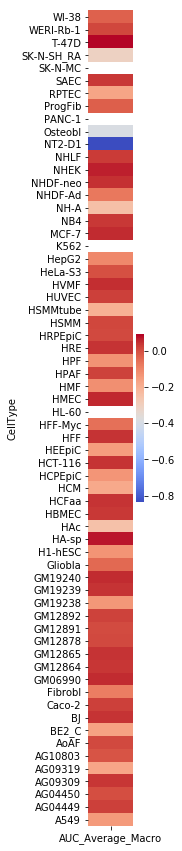

In [166]:
rcParams['figure.figsize'] = 1, 15

saveHeatmap(pd.DataFrame(epitome_auc['AUC_Average_Macro'] - deepsea_auc['AUC_Average_Macro']), 
           os.path.join(plot_output, 'AUC_macro_heatmap.pdf'))


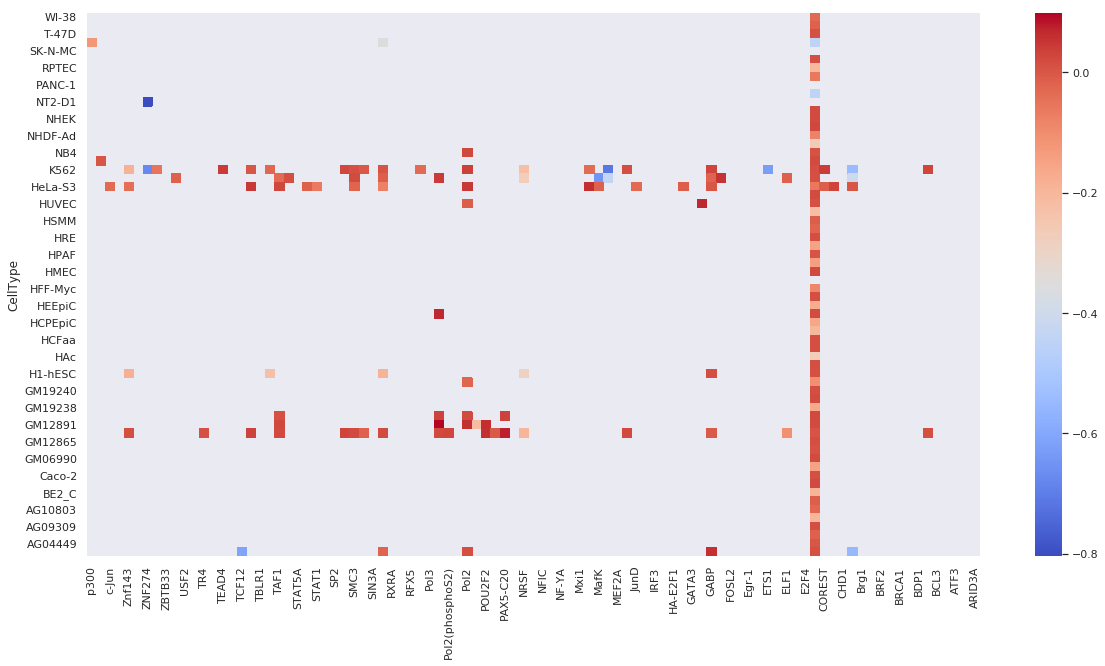

In [191]:
rcParams['figure.figsize'] = 20, 10
sns.set(font_scale=1)  
df = epitome_auc[c_auc] - deepsea_auc[c_auc]
saveHeatmap(df, 
           os.path.join(plot_output, 'AUC_TF_heatmap.pdf'))


## PR Comparisons

In [71]:
deepsea_pr = pd.read_csv(os.path.join(deepSEA_output, "DeepSEA_PR.csv"), sep="\t")

deepsea_av_pr = pd.read_csv(os.path.join(deepSEA_output, "DeepSEA_AVERAGE_PR.csv"), sep="\t")

epitome_pr = pd.read_csv(os.path.join(epitome_output, "Epitome_PR.csv"), sep="\t")

epitome_pr.set_index('CellType', inplace=True)
deepsea_pr.set_index('CellType', inplace=True)
deepsea_av_pr.set_index('CellType', inplace=True)

## Make heatmap

In [173]:

c1 = list(deepsea_pr.columns)

c1.remove('Unnamed: 0')
c1.remove('DNase')
c1.remove('PR_Average')


c2 = list(epitome_pr.columns)

c2.remove('Unnamed: 0')
c2.remove('PR_Average')


c_pr = intersection(c1,c2)



In [188]:
os.path.join(plot_output, 'PR_MACRO_heatmap.pdf')

'/home/eecs/akmorrow/epitome/out/figures/PR_MACRO_heatmap.pdf'

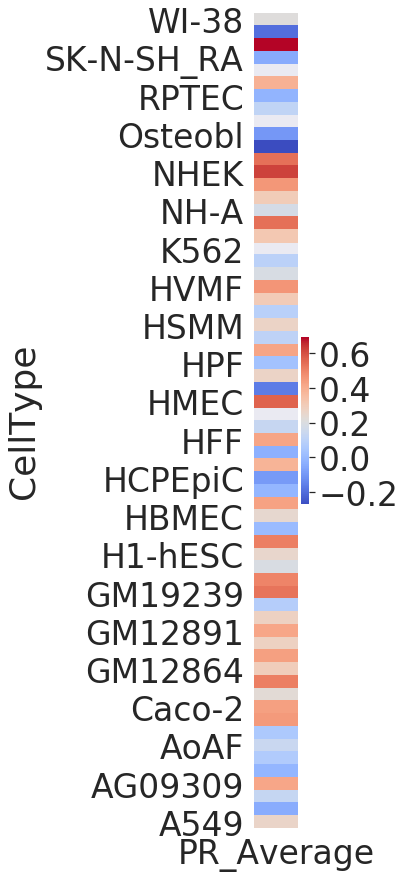

In [182]:
rcParams['figure.figsize'] = 1, 15
df = pd.DataFrame(deepsea_pr['PR_Average'] - epitome_pr['PR_Average'])

saveHeatmap(pd.DataFrame(df), 
           os.path.join(plot_output, 'PR_MACRO_heatmap.pdf'))


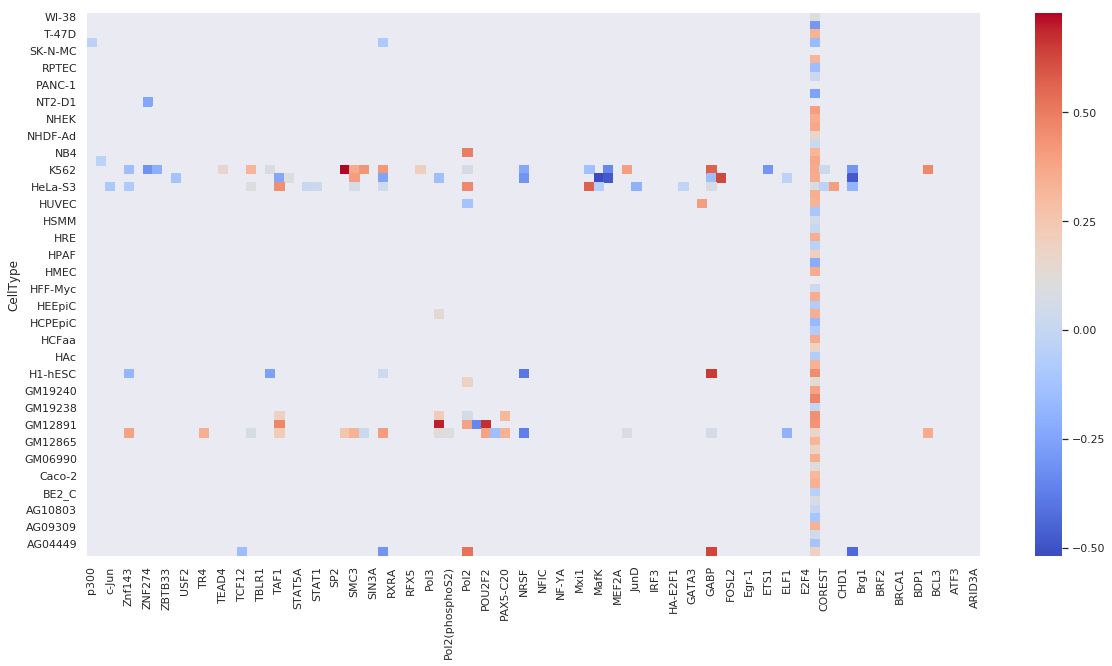

In [186]:
rcParams['figure.figsize'] = 20, 10
sns.set(font_scale=1)  
df = epitome_pr[c_pr] - deepsea_pr[c_pr]

saveHeatmap(df, 
           os.path.join(plot_output, 'PR_TF_heatmap.pdf'))


In [178]:
len(c_auc)

95

# Save meaned metrics to file

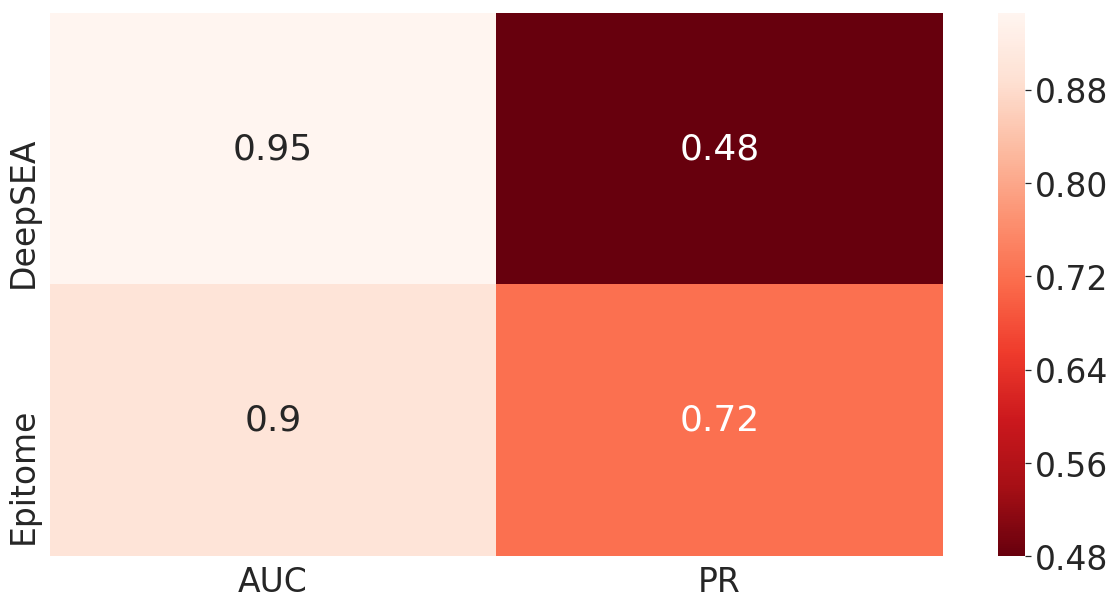

In [189]:
a = np.nanmean(deepsea_auc['AUC_Average_Macro'])
b = np.nanmean(deepsea_pr['PR_Average'])

c = np.nanmean(epitome_auc['AUC_Average_Macro'])
d = np.nanmean(epitome_pr['PR_Average'])

arr = np.array([[a,b],[c,d]])

df = pd.DataFrame(arr, index=['DeepSEA', 'Epitome'], columns=['AUC', 'PR'])
sns.set(font_scale=3)  
saveHeatmap(df, 
           os.path.join(plot_output, 'PR_confusion_heatmap.pdf'), annot=True, cmap = "Reds_r")